<a href="https://colab.research.google.com/github/dilannery/data-challenges/blob/master/airbnb-data-analysis/Airbnb_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis - Rio de Janeiro
---

[Airbnb](https://www.airbnb.com.br/) revolutionized the lodge market without own any hotel room. They are part of something known as the "shared economy". In that model, the traditional way of doing business, where individuals buy things from companies are replaced by a different approach where an individual can hire thing from other individuals.

That's the case of Airbnb, they allow anyone who had some free space to connect with others who were looking for a place to stay, whether for a night or a whole month.

Throughout the portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), it's possible to get some data about Airbnb operations around the world. That platform was created by Murray Cox and is independent from Airbnb Inc.

**In this notebook, we'll get the data about the city of Rio de Janeiro in Brazil and we'll extract some insights about it.**

## **Data Gathering**

For this analysis, we'll use that dataset from **Inside Airbnb** about the city of Rio de Janeiro:

*   [listings.csv](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv) - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

To ensure that the dataset I'm using in this notebook is exactly the same in the future, I'll use a copy of the dataset hosted on these [project repository](https://github.com/dilannery/data-challenges/tree/master/airbnb-data-analysis).

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/dilannery/data-challenges/master/airbnb-data-analysis/listings.csv')

Dataset loaded now it's time to dig into the data.

## **Data Analysis**

### **Exploring dataset**

First we'll start by exploring the data to extract some informations about the dataset and how the datapoints are structured.

To begin, let's take a look on the first five rows of the dataset to get a overview of its format.

In [61]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


We notice that the dataset consists of the following variables:

* `id` - unique number that represents the lodging
* `name` - lodging name
* `host_id` - id of the lodging owner
* `host_name` - name of the lodging owner
* `neighbourhood_group` - a bigger group which each neighbourhood can be part of.
* `neighbourhood` - neighbourhood name
* `latitude` - latitude coordinate of the lodging
* `longitude` - longitude coordinate of the lodging
* `room_type` - category of the room
* `price` - price to rent the lodging
* `minimum_nights` - minimun amout of nights that the host allow the lodging to be rent
* `number_of_reviews` - total amount of reviews
* `last_review` - date of the last review
* `reviews_per_month` - total of reviews per month
* `calculated_host_listings_count` - total of lodging owned by the host
* `availability_365` - total number of days that the lodging is available in one year.

Based on the quick overview of the data we built that data dictionary and now we'll start to answer some questions about the dataset.

### Q1. What's the shape of the data?

We'll now understand how many data points do we have and what is the data type of each variable.

In [62]:
# dataframe shape
print("Variables:\t {}".format(df.shape[1])) # Columns
print("Entries:\t {}".format(df.shape[0])) # Rows

Variables:	 16
Entries:	 35870


In [63]:
# data type of each variable
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Q2. How many missing values do we have?

Missing data could compromise our analysis and also any future work we do with the data. That said, we need to look for missing data in the dataset in order to understand why they are missing and what we can do to fix this.

Some options to deal with missing data could be, remove the variable of the data, replace the missing values by a default one (zero for example) or use a mathematical formula to reconstruct the data.

Let's take a look on how many percent of each variable has missing values.


In [64]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

We notice that

* The `neighbourhood_group` don't have any data in this variable, therefore we'll remove it.
* The columns `reviews_per_month` and `last_review` has almost 50% of missing values.
* `name` has around 0.1% of missing values
* `host_name` has around 0.01% of missing values

### **Q3. How the variables are distributed?**

Now that we found which data is missing in the dataset. Let's take a look on the distribution of the numeric data and take some conclusions about it.

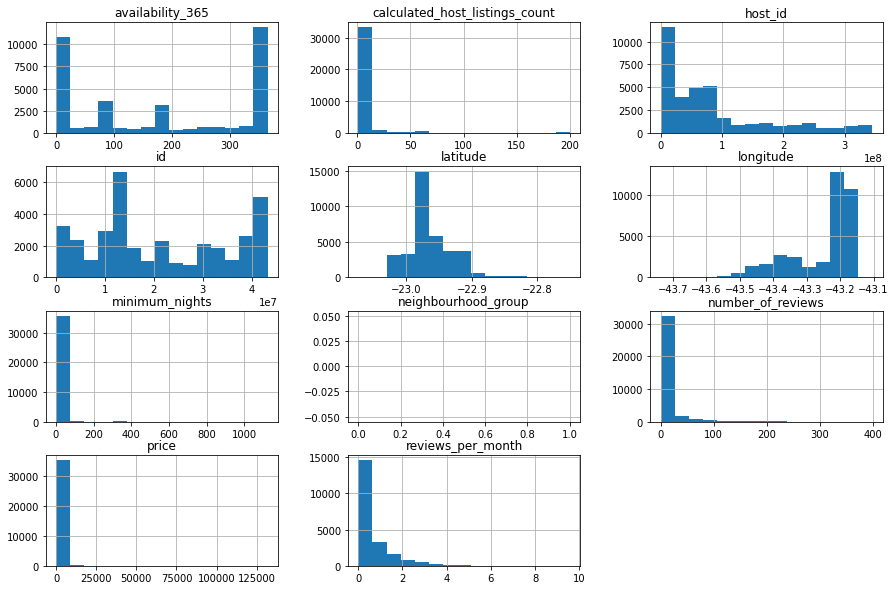

In [65]:
df.hist(bins=15, figsize=(15,10));

Looking to the histograms for the variables `minimum_nights` and `price` we see some indicatives of some anomalies in those values. That leads us to the next question.

### **Q4. Is there any *outliers*?**

In the histograms above we notice that some graphs indicates values that are very far of the common ones. Let's take a closer look on how the data is distributed.

In [66]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


Almost all numeric variable on this dataset has outliers. We'll investigate more deeper the variables `price` and `minimum_nights`. In order to do that, we're going to see the boxplot for each one of those variables.

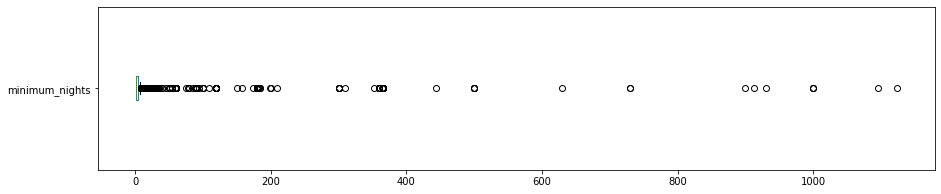

In [67]:
# minimum_nights boxplot
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

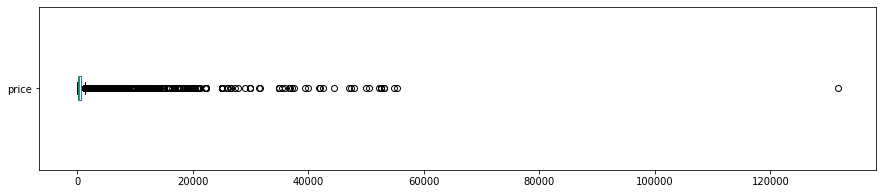

In [68]:
# price boxplot
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

As we can see through the boxplots both variables has a lot of different values that doesn't fit in the upper limit of the distribution. We'll remove those values based on those limits.

To calculate the upper and low limits we first need to find the Interquartile Range (IQR) using this formula:

$$
\begin{equation*}
IQR = Q_3 - Q_1
\end{equation*}
$$

With the result of the IQR we can calculate the lower limit (LL) and upper limit (UL) using these other formular

$$
\begin{equation*}
LL = Q_1 - 1.5*IQR \\
UL = Q_3 + 1.5*IQR
\end{equation*}
$$

Since we don't have any outlier under the lower limit we'll only calculate the upper limit and use the result to remove the outliers

In [69]:
from scipy.stats import iqr # Compute the interquartile range of the data along the specified axis.

price_iqr = iqr(df.price)
minimum_nights_iqr = iqr(df.minimum_nights)

upper_limit_price = df.price.quantile(q=0.75) + 1.5 * price_iqr
upper_limit_minimum_nights = df.minimum_nights.quantile(q=0.75) + 1.5 * minimum_nights_iqr

print("Upper limit for price is: {}".format(upper_limit_price))
print("Upper limit for minimum nights is: {}".format(upper_limit_minimum_nights))

Upper limit for price is: 1343.0
Upper limit for minimum nights is: 8.5


##### **4.2. Removing the outlier**

Now we're going to use the upper limit of both variables to remove the outliers.

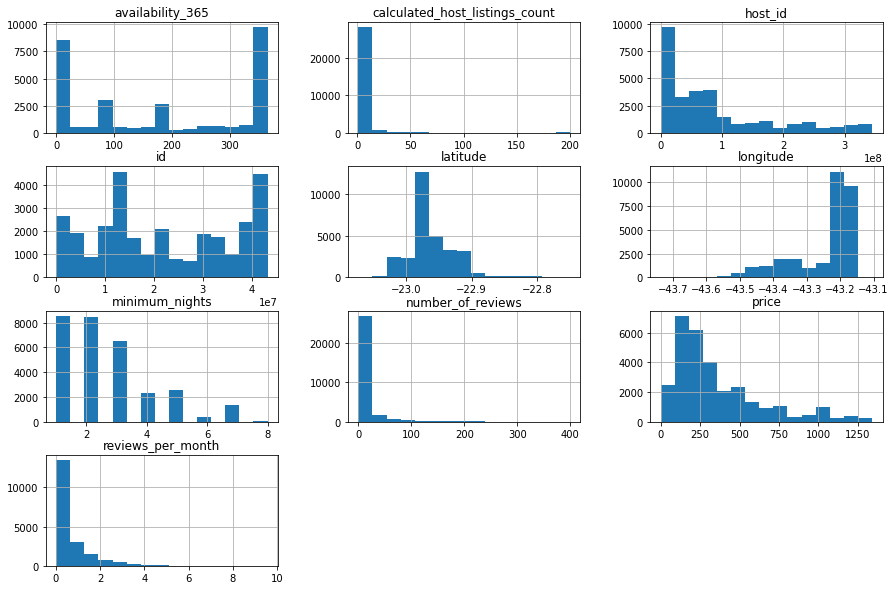

In [70]:
# removing outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > upper_limit_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > upper_limit_minimum_nights].index, axis=0, inplace=True)

# remove also `neighbourhood_group` because 100% of its values are missing
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# histogram plot
df_clean.hist(bins=15, figsize=(15,10));

Let's take a look on the boxplot again to see how our data is now distributed

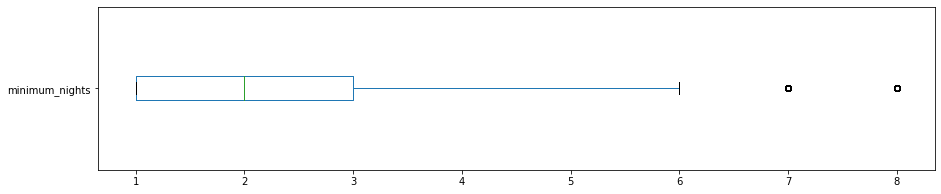

In [71]:
# minimum_nights boxplot
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

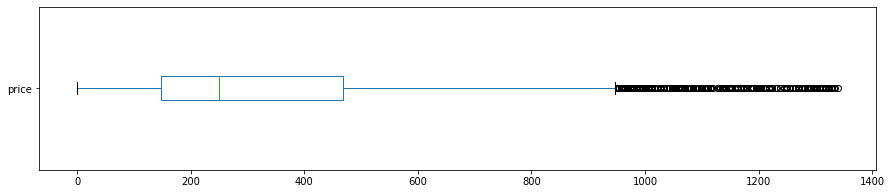

In [72]:
# price boxplot
df_clean.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

Now that we cleaned our data removing missing values and outliers, we'll extract more informations that allow us to make some assumptions about the scenario.

### **Q5. What type of room is more anounced?**

The variable `room_type` represents the type of each lodging. The values we have on these dataset are:

* Entire home/apt
* Private room
* Shared room
* Hotel room

We'll extract how many lodgings of each type do we have and also what is the percentage of each type related with the whole.

In [73]:
# count room_type
room_type_count = df_clean.room_type.value_counts()

room_type_count

Entire home/apt    20594
Private room        8651
Shared room          721
Hotel room           158
Name: room_type, dtype: int64

In [74]:
# percentage of room_type
room_type_count / df_clean.shape[0]

Entire home/apt    0.683641
Private room       0.287180
Shared room        0.023934
Hotel room         0.005245
Name: room_type, dtype: float64

### **Q6. What are the top 10 most expensive neighbourhoods?**

We also have the name of the neighbourhood that each lodging belongs to. We'll use that variable to determine what is the mean price charged on each neighbourhood and order to know the *top 10* most expensive ones.

In [75]:
top10_neighbourhood_prices = df_clean.groupby(['neighbourhood']).price.agg(['count', 'mean']).sort_values(by='mean', ascending=False)[:10]

top10_neighbourhood_prices

,count,mean
neighbourhood,,
Vaz Lobo,2,649.000000
Ricardo de Albuquerque,5,601.200000
Lagoa,301,495.940199
Deodoro,2,474.000000
Inhoaíba,3,466.000000
Leblon,1328,462.512048
Pedra de Guaratiba,14,454.714286
Ipanema,2598,442.127791
Pavuna,5,436.000000


To finish we're going to use latitude and longitude values to plot a very intersting chart using scatter plot to take a look on the areas that we have more datapoints concentration.

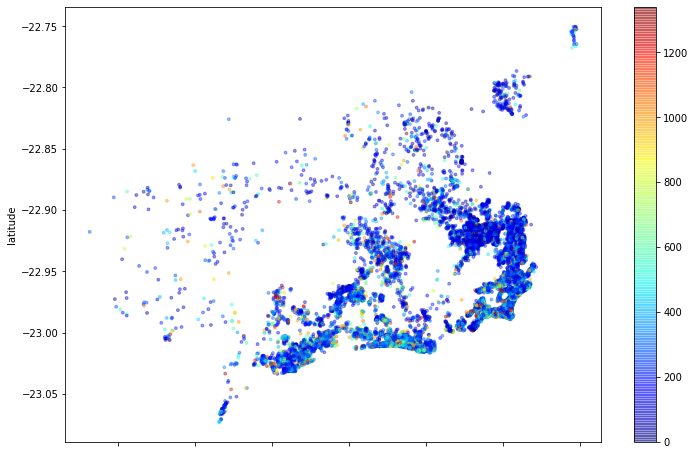

In [76]:
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
              c=df_clean.price, s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusions

In this analysis we used the dataset from **Inside Airbnb**, about the city of Rio de Janeiro and did some exploratory analysis over the data to understand its behavior. 

We started by understand the dataset, its shape, amount of variables and what each one mean and then proceded to clean up the missing and outliers values. After that we use the cleaned dataset to investigate the amount of lodgings available by type and which are the top 10 most expensive ones by neighbourhood.

We notice that some of the lodgings in the most expensive list only have a few datapoints in the dataset, because of that we can't take the results for granted because the sample isn't representative of the real population. We could take a deeper look on that in the future.